<h1>Dermalyze : Facial skin analysis app to detect skin problems for preliminary diagnosis <h1>

<h2>Machine Learning for Skin Disease Detection<h2>


In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import numpy as np
from shutil import copyfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
#Link dari file skin disease adalah https://github.com/khenihikmah/bangkit-capstone/blob/main/Dataset/skin-disease.zip?raw=true

!wget --no-check-certificate \
    "https://github.com/khenihikmah/bangkit-capstone/blob/main/Dataset/skin-disease.zip?raw=true" \
    -O "/tmp/skin-disease.zip"

--2024-06-19 09:45:25--  https://github.com/khenihikmah/bangkit-capstone/blob/main/Dataset/skin-disease.zip?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/khenihikmah/bangkit-capstone/raw/main/Dataset/skin-disease.zip [following]
--2024-06-19 09:45:26--  https://github.com/khenihikmah/bangkit-capstone/raw/main/Dataset/skin-disease.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/khenihikmah/bangkit-capstone/main/Dataset/skin-disease.zip [following]
--2024-06-19 09:45:26--  https://raw.githubusercontent.com/khenihikmah/bangkit-capstone/main/Dataset/skin-disease.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.g

#Extract Zip

In [ ]:
local_zip = '/tmp/skin-disease.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
import os
import shutil
source_path = '/tmp/skin-disease/skin-disease'

source_path_acne = os.path.join(source_path, 'Acne')
source_path_black_spots = os.path.join(source_path, 'Black Spots')
source_path_puff_eyes = os.path.join(source_path, 'Puff Eyes')
source_path_wrinkles = os.path.join(source_path, 'Wrinkles')
source_path_melasma = os.path.join(source_path, 'Melasma')

#os.listdir returns a list containing all files under the given path

In [ ]:
print(f"There are {len(os.listdir(source_path_acne))} images of acne.")
print(f"There are {len(os.listdir(source_path_black_spots))} images of black spots.")
print(f"There are {len(os.listdir(source_path_puff_eyes))} images of puff eyes.")
print(f"There are {len(os.listdir(source_path_wrinkles))} images of wrinkle.")
print(f"There are {len(os.listdir(source_path_melasma))} images of melasma.")

There are 100 images of acne.
There are 100 images of black spots.
There are 99 images of puff eyes.
There are 100 images of wrinkle.
There are 101 images of melasma.


# Define root directory

In [ ]:
root_dir = '/tmp/skin-disease/skin-disease'


# Empty directory to prevent FileExistsError is the function is run several times

In [ ]:
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_test_dirs

In [ ]:
def create_train_test_dirs(root_path):
  training_path = 'training'
  testing_path = 'testing'
  wrinkles_path = 'wrinkles'
  acne_path = 'acne'
  melasma_path = 'melasma'
  black_spots_path = 'black_spots'
  puff_eyes_path = 'puff_eyes'
  path_arr = [testing_path, training_path]
  path_arr2 = [wrinkles_path, acne_path, black_spots_path, puff_eyes_path,  melasma_path]
  try:
    for path1 in path_arr:
      path_first = os.path.join(root_path, path1)
      if os.path.isdir(path_first):
        break
      os.makedirs(path_first)
      for path2 in path_arr2:
        path_second = os.path.join(path_first, path2)
        if os.path.isdir(path_second):
          break
        os.makedirs(path_second)
  except OSError:
    pass

In [ ]:
  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

# GRADED FUNCTION: split_data

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  list_file = []
  for filename in os.listdir(SOURCE):
    path = SOURCE + filename
    if os.path.getsize(path) > 0:
      list_file.append(filename)
    else:
      print("{} is zero length, so ignoring.".format(filename))

  number_of_files = len(list_file)
  split = int(number_of_files * SPLIT_SIZE)

  shuffle = random.sample(list_file, number_of_files)
  train_file = shuffle[:split]
  test_file = shuffle[split:]

  for filename in train_file:
    copyfile(SOURCE + filename, TRAINING + filename)
  for filename in test_file:
    copyfile(SOURCE + filename, TESTING + filename)

# split_data function

In [ ]:
# Define paths
ACNE_SOURCE_DIR = "/tmp/skin-disease/skin-disease/Acne/"
WRINKLES_SOURCE_DIR = "/tmp/skin-disease/skin-disease/Wrinkles/"
BLACK_SPOTS_SOURCE_DIR = "/tmp/skin-disease/skin-disease/Black Spots/"
PUFF_EYES_SOURCE_DIR = "/tmp/skin-disease/skin-disease/Puff Eyes/"
MELASMA_SOURCE_DIR = "/tmp/skin-disease/skin-disease/Melasma/"

# TRAINING_DIR = "/tmp/skin-disease-train-test/training/"
# TESTING_DIR = "/tmp/skin-disease-train-test/testing/"

TRAINING_DIR = "/tmp/skin-disease/skin-disease/training/"
TESTING_DIR = "/tmp/skin-disease/skin-disease/testing/"


TRAINING_ACNE_DIR = os.path.join(TRAINING_DIR, "acne/")
TESTING_ACNE_DIR = os.path.join(TESTING_DIR, "acne/")

TRAINING_WRINKLES_DIR = os.path.join(TRAINING_DIR, "wrinkles/")
TESTING_WRINKLES_DIR = os.path.join(TESTING_DIR, "wrinkles/")

TRAINING_BLACK_SPOTS_DIR = os.path.join(TRAINING_DIR, "black_spots/")
TESTING_BLACK_SPOTS_DIR = os.path.join(TESTING_DIR, "black_spots/")

TRAINING_PUFF_EYES_DIR = os.path.join(TRAINING_DIR, "puff_eyes/")
TESTING_PUFF_EYES_DIR = os.path.join(TESTING_DIR, "puff_eyes/")

TRAINING_MELASMA_DIR = os.path.join(TRAINING_DIR, "melasma/")
TESTING_MELASMA_DIR = os.path.join(TESTING_DIR, "melasma/")

#Extract Zip

In [ ]:
local_zip = '/tmp/skin-disease.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Empty directories in case you run this cell multiple times

In [ ]:
if len(os.listdir(TRAINING_ACNE_DIR)) > 0:
  for file in os.scandir(TRAINING_ACNE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_WRINKLES_DIR)) > 0:
  for file in os.scandir(TRAINING_WRINKLES_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_PUFF_EYES_DIR)) > 0:
  for file in os.scandir(TRAINING_PUFF_EYES_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_BLACK_SPOTS_DIR)) > 0:
  for file in os.scandir(TRAINING_BLACK_SPOTS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_MELASMA_DIR)) > 0:
  for file in os.scandir(TRAINING_MELASMA_DIR):
    os.remove(file.path)

if len(os.listdir(TESTING_ACNE_DIR)) > 0:
  for file in os.scandir(TESTING_ACNE_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_WRINKLES_DIR)) > 0:
  for file in os.scandir(TESTING_WRINKLES_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_PUFF_EYES_DIR)) > 0:
  for file in os.scandir(TESTING_PUFF_EYES_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_BLACK_SPOTS_DIR)) > 0:
  for file in os.scandir(TESTING_BLACK_SPOTS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_MELASMA_DIR)) > 0:
  for file in os.scandir(TESTING_MELASMA_DIR):
    os.remove(file.path)

# Define proportion of images used for training

In [ ]:
split_size = .8

# Run the function

In [ ]:
# NOTE: Messages about zero length images should be printed out
split_data(ACNE_SOURCE_DIR, TRAINING_ACNE_DIR, TESTING_ACNE_DIR, split_size)
split_data(WRINKLES_SOURCE_DIR, TRAINING_WRINKLES_DIR, TESTING_WRINKLES_DIR, split_size)
split_data(PUFF_EYES_SOURCE_DIR, TRAINING_PUFF_EYES_DIR, TESTING_PUFF_EYES_DIR, split_size)
split_data(BLACK_SPOTS_SOURCE_DIR, TRAINING_BLACK_SPOTS_DIR, TESTING_BLACK_SPOTS_DIR, split_size)
split_data(MELASMA_SOURCE_DIR, TRAINING_MELASMA_DIR, TESTING_MELASMA_DIR, split_size)

print(f"There are {len(os.listdir(TRAINING_ACNE_DIR))} images of acne for training")
print(f"There are {len(os.listdir(TRAINING_WRINKLES_DIR))} images of wrinkles for training")
print(f"There are {len(os.listdir(TRAINING_PUFF_EYES_DIR))} images of puff eyes for training")
print(f"There are {len(os.listdir(TRAINING_BLACK_SPOTS_DIR))} images of black spots for training")
print(f"There are {len(os.listdir(TRAINING_MELASMA_DIR))} images of melasma for training")

print(f"There are {len(os.listdir(TESTING_ACNE_DIR))} images of acne for testing")
print(f"There are {len(os.listdir(TESTING_WRINKLES_DIR))} images of wrinkles for testing")
print(f"There are {len(os.listdir(TESTING_PUFF_EYES_DIR))} images of puff eyes for testing")
print(f"There are {len(os.listdir(TESTING_BLACK_SPOTS_DIR))} images of black spots for testing")
print(f"There are {len(os.listdir(TESTING_MELASMA_DIR))} images of melasma for testing")

There are 80 images of acne for training
There are 80 images of wrinkles for training
There are 79 images of puff eyes for training
There are 80 images of black spots for training
There are 80 images of melasma for training
There are 20 images of acne for testing
There are 20 images of wrinkles for testing
There are 20 images of puff eyes for testing
There are 20 images of black spots for testing
There are 21 images of melasma for testing


 # Download the inception v3 weights

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-06-13 09:21:44--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  28.2MB/s    in 3.0s    

2024-06-13 09:21:48 (28.2 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  from tensorflow.keras import layers
  for layer in pre_trained_model.layers:
    layer.trainable = False
  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [ ]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


# GRADED FUNCTION: output_of_last_layer

In [ ]:
def output_of_last_layer(pre_trained_model):
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


# Print the type of the pre-trained model

In [ ]:
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.src.engine.functional.Functional'>


# GRADED FUNCTION: train_val_generators

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=True)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=11,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  return train_generator, validation_generator


# Test your generators

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 399 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)
  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.5
  x = layers.Dropout(0.5)(x)
  # Add a final sigmoid layer for classification
  x = layers.Dense(5, activation='softmax')(x)

  from tensorflow.keras.optimizers import RMSprop
  from tensorflow.keras import Model
  # Create the complete model by using the Model class
  model = Model(pre_trained_model.input, x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  return model

# Define a Callback class that stops training

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.7 and logs.get('accuracy')>0.80 and logs.get('val_loss')<0.96):
      print("\nReached 86% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,516,581 total parameters in this model.
There are 38,541,317 trainable parameters in this model.


In [ ]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 0,7 accuracy
# (It should take a few epochs)
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 200,
                    verbose = 1,
                    callbacks=[callbacks])

Epoch 1/200
20/20 [==============================] - 17s 361ms/step - loss: 1.8523 - accuracy: 0.3083 - val_loss: 1.3372 - val_accuracy: 0.4300
Epoch 2/200
20/20 [==============================] - 3s 167ms/step - loss: 1.5015 - accuracy: 0.4085 - val_loss: 1.3419 - val_accuracy: 0.4500
Epoch 3/200
20/20 [==============================] - 3s 156ms/step - loss: 1.3621 - accuracy: 0.4837 - val_loss: 1.2563 - val_accuracy: 0.4200
Epoch 4/200
20/20 [==============================] - 3s 145ms/step - loss: 1.2511 - accuracy: 0.4887 - val_loss: 1.1936 - val_accuracy: 0.5000
Epoch 5/200
20/20 [==============================] - 3s 146ms/step - loss: 1.2413 - accuracy: 0.5238 - val_loss: 1.3200 - val_accuracy: 0.4600
Epoch 6/200
20/20 [==============================] - 4s 212ms/step - loss: 1.2246 - accuracy: 0.5238 - val_loss: 1.1711 - val_accuracy: 0.5100
Epoch 7/200
20/20 [==============================] - 3s 146ms/step - loss: 1.0959 - accuracy: 0.5514 - val_loss: 1.2983 - val_accuracy: 0.510

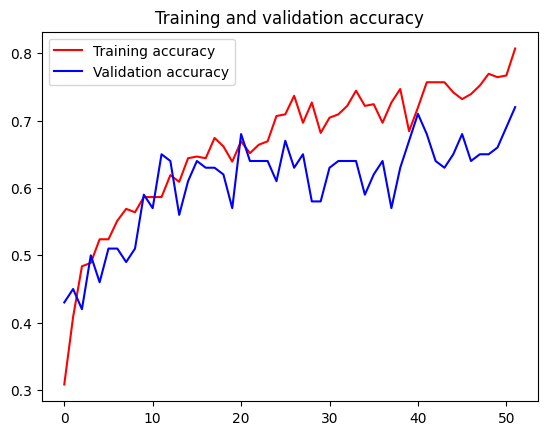

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print("acne ")
  print(classes[0][0])
  print("blackspot ")
  print(classes[0][1])
  print("puff eyes ")
  print(classes[0][2])
  print("wrinkles ")
  print(classes[0][3])
  print("melasma ")
  print(classes[0][4])
  # if classes[0]>0.5:
  #   print(fn + " is a human")
  # else:
  #   print(fn + " is a horse")

TypeError: 'NoneType' object is not subscriptable

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Save the entire model as a SavedModel

In [ ]:
!mkdir -p saved_model
path = './gdrive/MyDrive/Model-ML'
model.save(path+'/saved_model/my_model_disease')

In [ ]:
from keras.models import load_model

MODEL_PATH = './gdrive/MyDrive/Model-ML/skin-disease-model.h5'

# Now save model in drive
model.save(MODEL_PATH)

# Load Model
model = load_model(MODEL_PATH)

In [ ]:
from keras.models import load_model

MODEL_PATH = '/content/drive/My Drive/Model-ML/skin-disease-model.h5'

# Now save model in drive
model.save(MODEL_PATH)

# Load Model
model = load_model(MODEL_PATH)

# Save the entire model as a SavedModel

In [ ]:
!mkdir -p saved_model
path = './drive/My Drive/Model-ML'
model.save(path+'/saved_model/skin-disease_model')

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()